# Thanksgiving Favorites
## Celeste Carberry

### Brief Project Overview 
The dataset I am analyzing is built from a 2015 survey of 1059 Americans who answered questions about how they spend their Thanksgiving Holiday. My modeling goal is to visualize generally what Americans are eating and then begin to explore how this may differ by geographical region. 

In [1]:
library(ggplot2) 
library(tidyverse) 
theme_set(theme_classic())

thanks = read.csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv',
stringsAsFactors = FALSE) 
thanks %>% head

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,RespondentID,Do.you.celebrate.Thanksgiving.,What.is.typically.the.main.dish.at.your.Thanksgiving.dinner.,What.is.typically.the.main.dish.at.your.Thanksgiving.dinner....Other..please.specify.,How.is.the.main.dish.typically.cooked.,How.is.the.main.dish.typically.cooked....Other..please.specify.,What.kind.of.stuffing.dressing.do.you.typically.have.,What.kind.of.stuffing.dressing.do.you.typically.have....Other..please.specify.,What.type.of.cranberry.saucedo.you.typically.have.,What.type.of.cranberry.saucedo.you.typically.have....Other..please.specify.,⋯,Have.you.ever.tried.to.meet.up.with.hometown.friends.on.Thanksgiving.night.,Have.you.ever.attended.a..Friendsgiving..,Will.you.shop.any.Black.Friday.sales.on.Thanksgiving.Day.,Do.you.work.in.retail.,Will.you.employer.make.you.work.on.Black.Friday.,How.would.you.describe.where.you.live.,Age,What.is.your.gender.,How.much.total.combined.money.did.all.members.of.your.HOUSEHOLD.earn.last.year.,US.Region
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,4337954960,Yes,Turkey,,Baked,,Bread-based,,None,,⋯,Yes,No,No,No,,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
2,4337951949,Yes,Turkey,,Baked,,Bread-based,,Other (please specify),Homemade cranberry gelatin ring,⋯,No,No,Yes,No,,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
3,4337935621,Yes,Turkey,,Roasted,,Rice-based,,Homemade,,⋯,Yes,Yes,Yes,No,,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
4,4337933040,Yes,Turkey,,Baked,,Bread-based,,Homemade,,⋯,Yes,No,No,No,,Urban,30 - 44,Male,"$200,000 and up",Pacific
5,4337931983,Yes,Tofurkey,,Baked,,Bread-based,,Canned,,⋯,Yes,No,No,No,,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific
6,4337929779,Yes,Turkey,,Roasted,,Rice-based,,Homemade,,⋯,Yes,Yes,Yes,No,,Urban,18 - 29,Male,"$0 to $9,999",Pacific


### Visualizing and Interpreting the Data

In [4]:
main_dish = thanks %>% group_by(Do.you.celebrate.Thanksgiving.,What.is.typically.the.main.dish.at.your.Thanksgiving.dinner.)%>% #groupingbythesetwovariables 
tally() %>% # counting the number of responses 
mutate(perc = n / sum(n) * 100) %>%
dplyr::select(-n) %>%
filter (Do.you.celebrate.Thanksgiving. == "Yes")%>%
filter (What.is.typically.the.main.dish.at.your.Thanksgiving.dinner. != "")%>% 
filter (What.is.typically.the.main.dish.at.your.Thanksgiving.dinner. != "Other (please specify)")

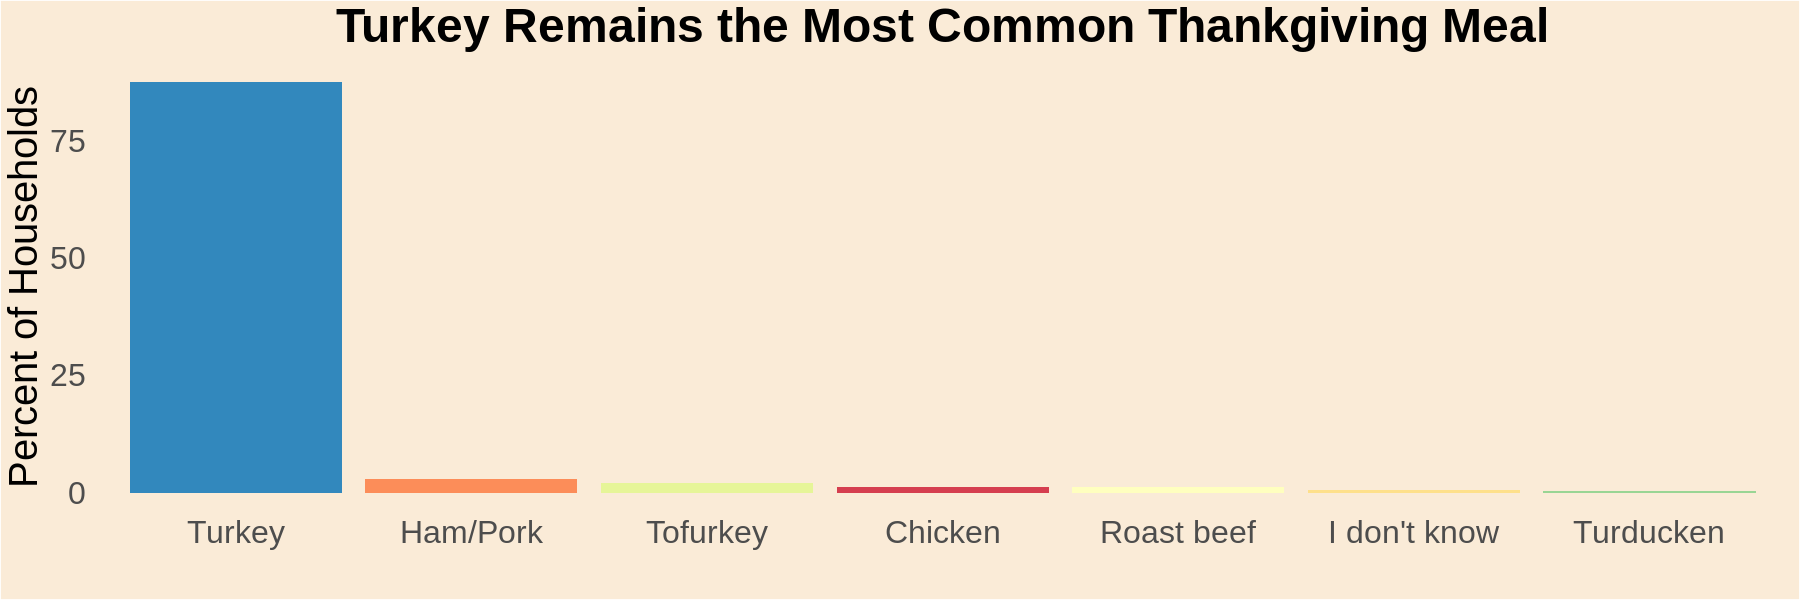

In [6]:
options(repr.plot.width = 15, repr.plot.height = 5)
p = ggplot(main_dish, aes(x=reorder(What.is.typically.the.main.dish.at.your.Thanksgiving.dinner.,-perc),
y = perc, fill= What.is.typically.the.main.dish.at.your.Thanksgiving.dinner.)) 
p = p + geom_col() +
    theme(axis.line = element_blank(),
    axis.ticks = element_blank(),
    text = element_text(size=24),
    plot.title = element_text(hjust = 0.5, face="bold"), legend.position = "none")+
    scale_fill_brewer(palette = "Spectral")+
    labs(x = "", y = "Percent of Households", title = "Turkey Remains the Most Common Thankgiving Meal")
p = p + theme(plot.background = element_rect(fill = "antiquewhite"), 
            panel.background = element_rect(fill = "antiquewhite"))
p

#### Turkey is the most popular main-dish served on Thanksgiving in American households Nationwide 
This figure provides a general overview of what Americans serve as the main dish on Thanksgiving. This chart represents all participants who 1. celebrate Thanksgiving and 2. reported what they serve as the main dish. Over ~80% of Americans reported that they enjoy Turkey as their main dish which is an overwhelming majority. An interesting finding from this analysis is that “tofurkey”, a vegetarian meat alternative, was a more popular main dish among survey participants than chicken. 

#### How is the main dish typically cooked? 
Given the obvious popularity of turkey, I wanted to evaluate how Americans prefer to cook it. There are numerous ways to cook a turkey, including baked, roasted, fried, and other creative variations.

In [8]:
main_dish_cooked = thanks %>% 
    group_by(Do.you.celebrate.Thanksgiving.,What.is.typically.the.main.dish.at.your.Thanksgiving.dinner.,How.is.the.main.dish.typically.cooked.)%>% #grouping by these variables
    tally() %>% # counting the number of responses
    mutate(perc = n / sum(n) * 100) %>%
    dplyr::select(-n) %>%
    filter (Do.you.celebrate.Thanksgiving. == "Yes")%>%
    filter (What.is.typically.the.main.dish.at.your.Thanksgiving.dinner. !="")%>%
    filter (How.is.the.main.dish.typically.cooked. != "")%>%
    filter (What.is.typically.the.main.dish.at.your.Thanksgiving.dinner.=="Turkey")%>% 
    arrange(desc(How.is.the.main.dish.typically.cooked.))
main_dish_cooked %>% head

Do.you.celebrate.Thanksgiving.,What.is.typically.the.main.dish.at.your.Thanksgiving.dinner.,How.is.the.main.dish.typically.cooked.,perc
<chr>,<chr>,<chr>,<dbl>
Yes,Turkey,Roasted,40.861467
Yes,Turkey,Other (please specify),3.958091
Yes,Turkey,I don't know,1.280559
Yes,Turkey,Fried,4.772992
Yes,Turkey,Baked,49.126892


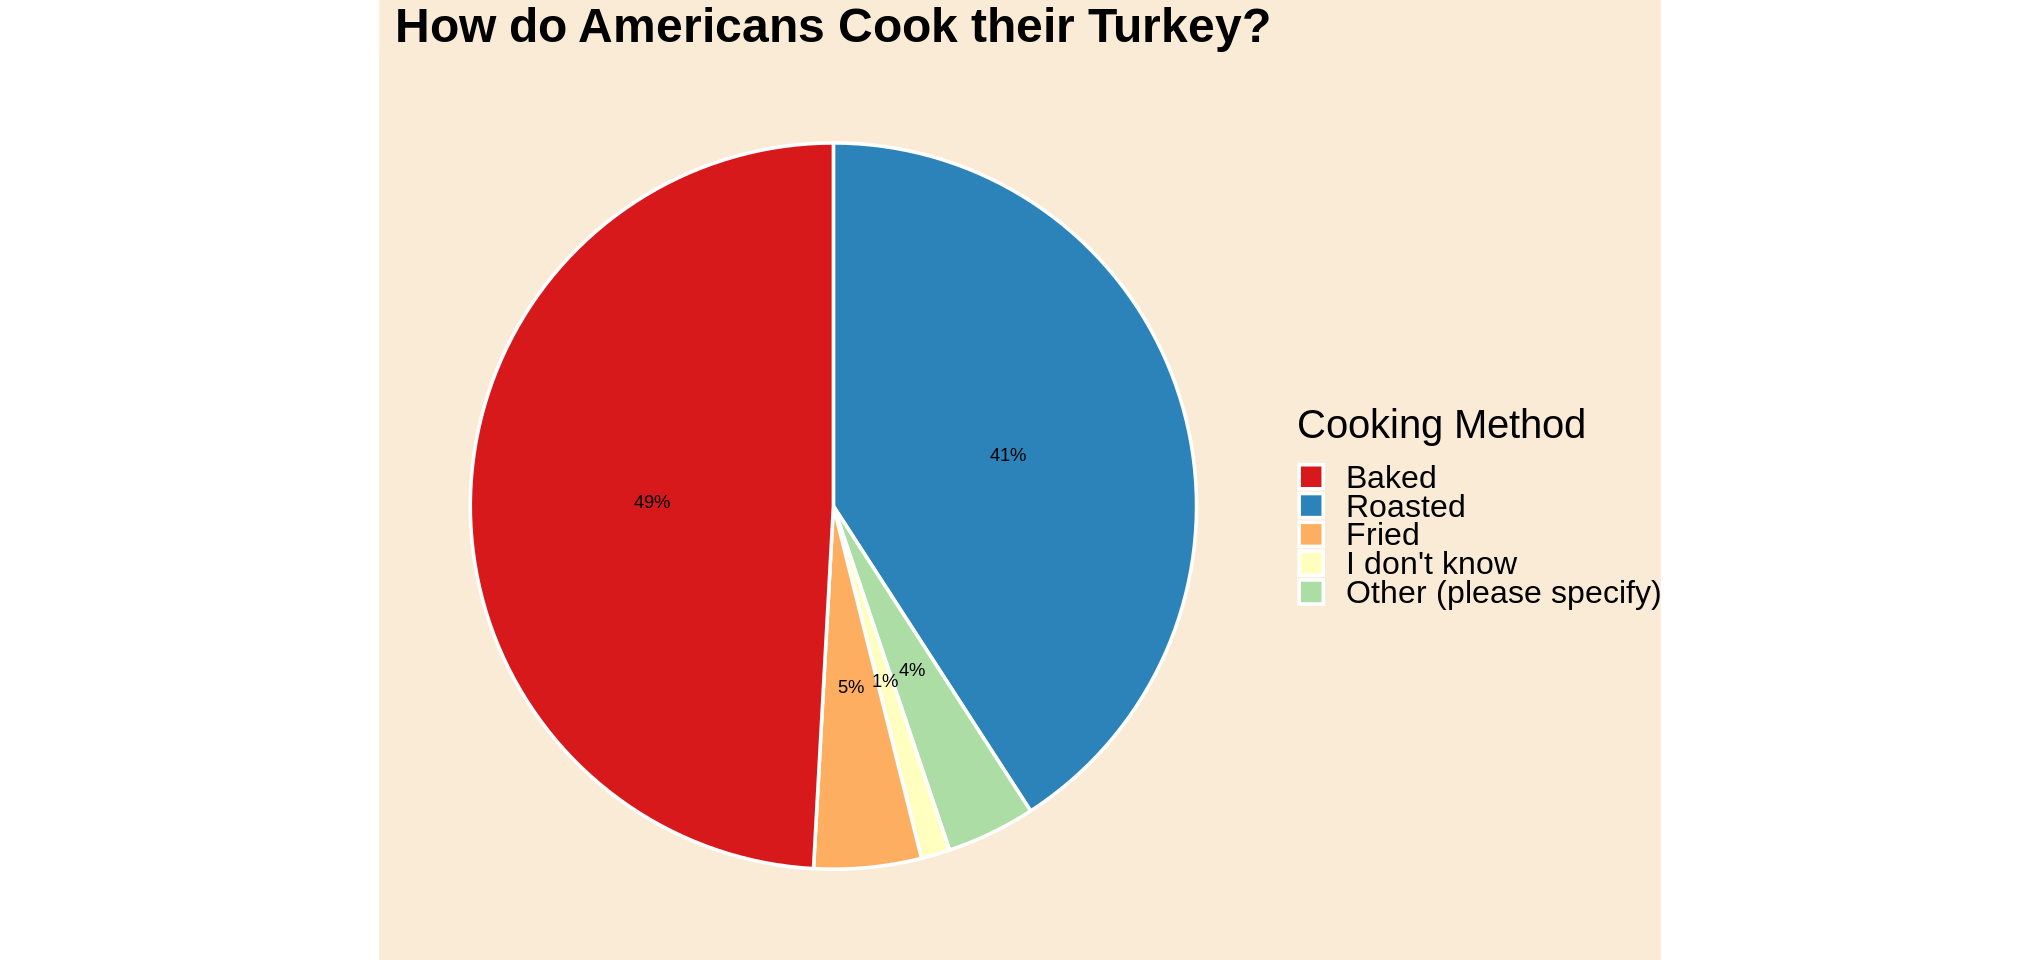

In [9]:
options(repr.plot.width = 17, repr.plot.height = 8)
ggplot(main_dish_cooked, aes(x="", y=perc, fill=How.is.the.main.dish.typically.cooked.)) + geom_bar(stat="identity", width=1, size =1, color = "white") +
    geom_text(aes(label = paste0(round(perc), "%")),
    position = position_stack(vjust = 0.5)) + labs(x = NULL,y = NULL, title ="How do Americans Cook their Turkey?")+ coord_polar("y", start=0) + theme_void() +
    theme(axis.line = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    text = element_text(size=24),
    plot.background = element_rect(fill = "antiquewhite", color ="antiquewhite"),
    panel.background = element_rect(fill = "antiquewhite", color ="antiquewhite"),
    plot.title = element_text(hjust = 0.5, face="bold")) +
    scale_fill_brewer(breaks=c("Baked","Roasted","Fried", "I don't know","Other (please specify)"), 
                      name = "Cooking Method", palette = "Spectral")

#### Preferred cooking method isn’t as unanimous 
The figure above shows that while baked is the most common method to prepare the Thanksgiving turkey (49%), it is followed closely by roasted turkey (41%). You may be wondering what the difference is between baking and roasting; baking turkey occurs at lower oven temperatures over longer periods of time, while roasting occurs at higher temperatures and thus requires less cooking time. 

#### Some side dishes also vary by geographical region 
Now onto arguably the best part of any Thanksgiving meal: the sides. Most households prepare an assortment of sides such as stuffing, salads, breads/rolls, potatoes, and casseroles among others. While turkey was served at the majority of households nationwide, some side dishes seem vary in popularity by geographical region. Let’s look at macaroni & cheese for example:

In [13]:
sides = thanks %>% 
    group_by(Which.of.these.side.dishes.aretypically.served.at.your.Thanksgiving.dinner..Please.select.all.that.apply....Macaroni.and.cheese, Do.you.celebrate.Thanksgiving.,US.Region,)%>% 
    tally() %>%    
    mutate(perc = n / sum(n) * 100) %>%
    dplyr::select(-n) %>%
    group_by(US.Region)%>%
    filter (Do.you.celebrate.Thanksgiving. == "Yes")%>% filter (US.Region != "")

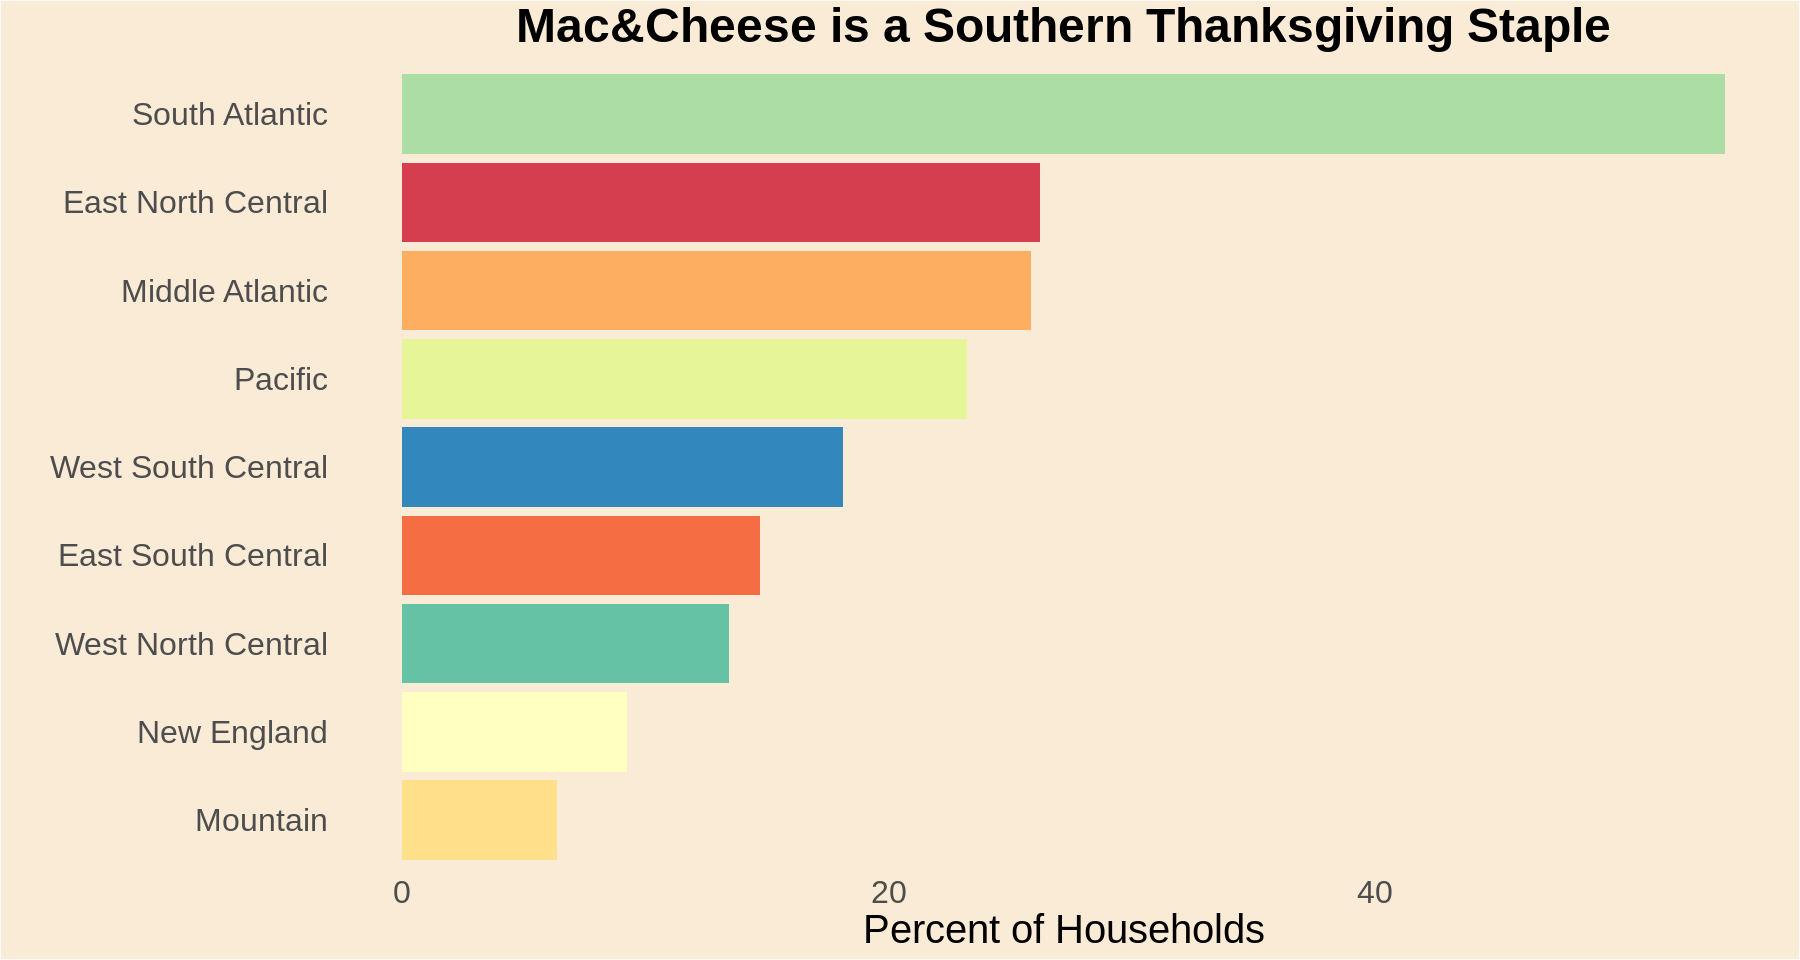

In [12]:
options(repr.plot.width = 15, repr.plot.height = 8)
p = ggplot(sides, aes(x= reorder(US.Region, +perc), y = perc, fill = US.Region)) 
p = p + geom_col() +
    theme(axis.line = element_blank(),
    axis.ticks = element_blank(),
    text = element_text(size=24),
    plot.title = element_text(hjust = 0.5, face = "bold"), legend.position = "none") +
    labs(x = "",y = "Percent of Households",
    title = "Mac&Cheese is a Southern Thanksgiving Staple") + coord_flip() +
    scale_fill_brewer(palette = "Spectral")
p = p + theme(plot.background = element_rect(fill = "antiquewhite"), 
                  panel.background = element_rect(fill = "antiquewhite")) 
p

#### Macaroni & cheese is a southern favorite
Macaroni & cheese is enjoyed in regions throughout the country, but it is clear it is favored particularly by the south. Over 50% of people from households in the South Atlantic reported having macaroni and cheese with their meal compared to only 5% and 6% in mountain regions and New England respectively. 


In [14]:
pie = thanks %>% 
    group_by(Do.you.celebrate.Thanksgiving.,US.Region,Which.type.of.pie.is.typically.served.at.your.Thanksgiving.dinner..Please.select.all.that.apply....Pumpkin)%>% 
    tally() %>% 
    mutate(perc = n / sum(n) * 100) %>% 
    dplyr::select(-n) %>%
    group_by(US.Region)%>%
    filter (Do.you.celebrate.Thanksgiving. == "Yes")%>%
    filter (US.Region != "")%>%
    filter (Which.type.of.pie.is.typically.served.at.your.Thanksgiving.dinner..Please.select.all.that.apply....Pumpkin != "") 
pie %>% print

# A tibble: 9 x 4
# Groups:   US.Region [9]
  Do.you.celebrate.Tha… US.Region    Which.type.of.pie.is.typically.serve…  perc
  <chr>                 <chr>        <chr>                                 <dbl>
1 Yes                   East North … Pumpkin                                77.9
2 Yes                   East South … Pumpkin                                67.9
3 Yes                   Middle Atla… Pumpkin                                79.3
4 Yes                   Mountain     Pumpkin                                82.9
5 Yes                   New England  Pumpkin                                83.6
6 Yes                   Pacific      Pumpkin                                80.8
7 Yes                   South Atlan… Pumpkin                                66.5
8 Yes                   West North … Pumpkin                                80.3
9 Yes                   West South … Pumpkin                                80  


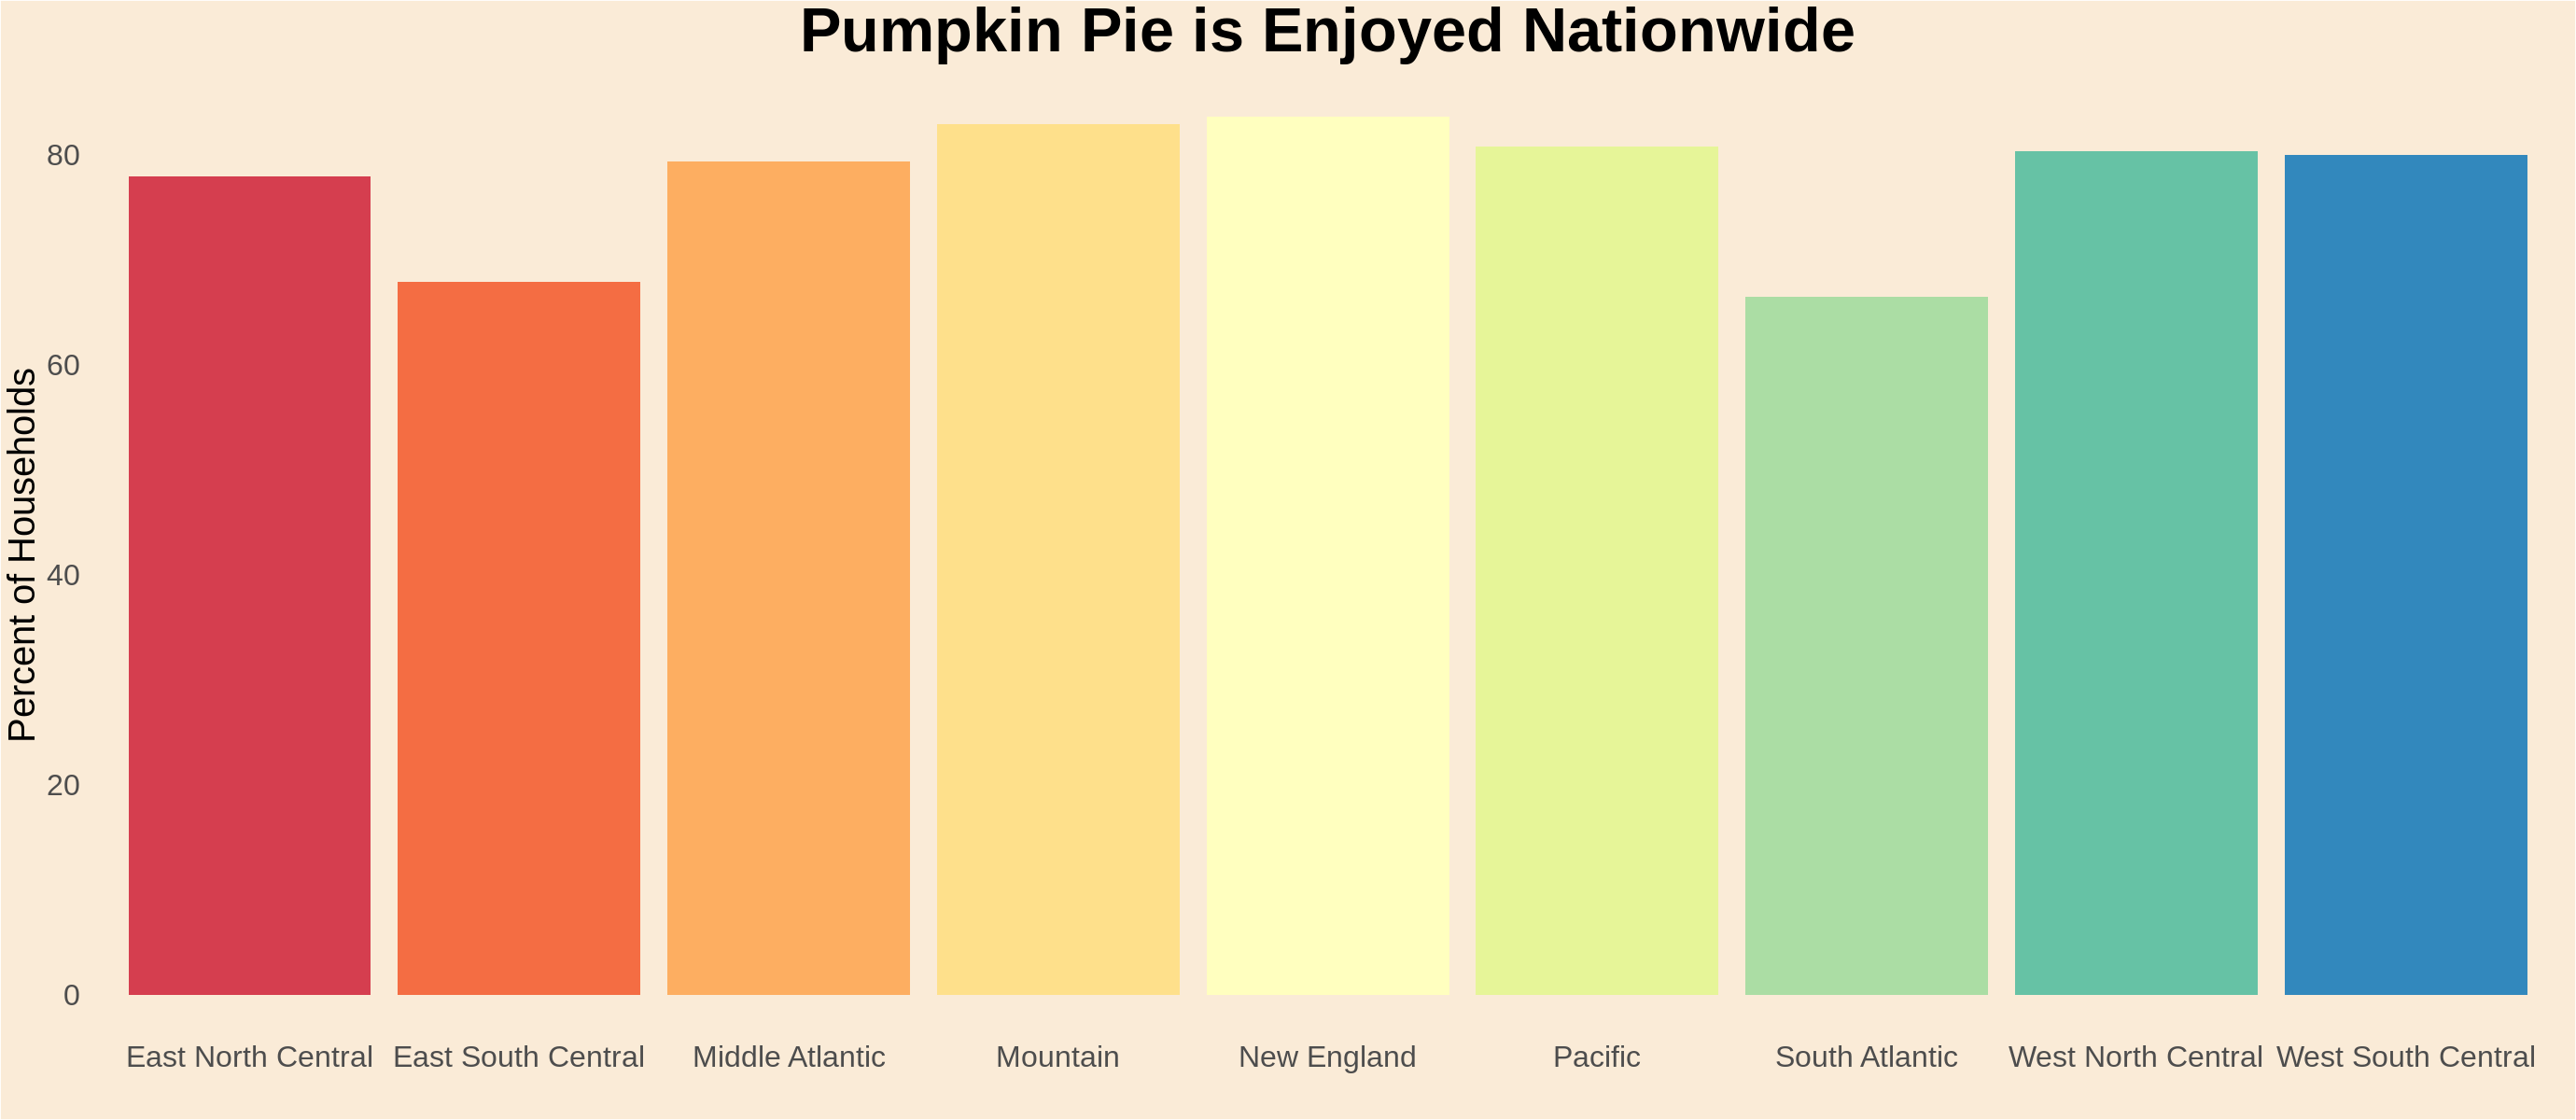

In [15]:
options(repr.plot.width = 23, repr.plot.height = 10)
p = ggplot(pie, aes(x= US.Region, y = perc, fill=US.Region)) 
p = p + geom_col()+
    theme(axis.line = element_blank(),
    axis.ticks = element_blank(),
    text = element_text(size=24), 
    plot.title = element_text(hjust = 0.5, size =40, face = "bold"), 
    legend.position = "none") + 
    labs(x = "", y = "Percent of Households", title = "Pumpkin Pie is Enjoyed Nationwide") + 
    scale_fill_brewer(palette = "Spectral")
p = p + theme(plot.background = element_rect(fill = "antiquewhite"), panel.background = element_rect(fill = "antiquewhite"))
p

#### Americans are unified on pumpkin pie 
This graph shows that pumpkin pie is served on Thanksgiving by roughly 80 percent of households. While Americans might not agree on all the side dishes, this graph shows a much more homogenous geographical spread throughout the United States. It can be assumed that much like turkey, pumpkin pie is a quintessential part of American Thanksgiving. 